In [2]:
<!DOCTYPE html>
<html>
<head>
  <title>Bank Customer Segmentation</title>
  
</head>
<body>
  <h1>Bank Customer Segmentation</h1>
  <p>Customer segmentation is the process of dividing a customer dataset into specific groups based on shared traits. In this project, we will perform customer segmentation on a dataset containing customer demographics and transactions data from an Indian bank.</p>

  
  <h2>Objective</h2>
  <p>The main objective of this project is to perform customer segmentation and identify popular customer groups along with their definitions/rules. By gaining a deeper understanding of our customers, the bank can better tailor its services to meet customer needs and preferences.</p>

  <h2>M</h2>
  <ul>
    <li>Perform Clustering / Segmentation on the dataset and identify popular customer groups.</li>
    <li>Perform Location-wise analysis to identify regional trends in India.</li>
    <li>Perform transaction-related analysis to identify interesting trends for improving user experiences.</li>
    <li>Conduct Customer Recency, Frequency, Monetary (RFM) analysis.</li>
    <li>Explore Network analysis or Graph analysis of customer data.</li>
  </ul>

  <h2>Steps to Follow</h2>
  <ol>
    <li>Data Preprocessing</li>
    <li>Customer Segmentation using Clustering Algorithms</li>
    <li>Evaluation of Customer Segments</li>
    <li>Additional Analysis as per Interest</li>
  </ol>

  <h2>Notebook Structure</h2>
  <p>This notebook will be structured as follows:</p>
  <ol>
    <li>Introduction</li>
    <li>Data Exploration</li>
    <li>Data Preprocessing</li>
    <li>Customer Segmentation</li>
    <li>Evaluation of Segmentation</li>
    <li>Additional Analysis</li>
    <li>Conclusion</li>
  </ol>

  <h2>Let's Get Started!</h2>
  <p>First, we'll import the necessary libraries and load the dataset. Then, we'll proceed with data exploration and preprocessing. After that, we'll apply clustering algorithms to perform customer segmentation. Let's dive in!</p>
</body>
</html>


SyntaxError: invalid syntax (3663479450.py, line 1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/bank-customer-segmentation/bank_transactions.csv')
df = df.sample(n=100000,random_state = 42)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 892845 to 804143
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   TransactionID            100000 non-null  object 
 1   CustomerID               100000 non-null  object 
 2   CustomerDOB              99671 non-null   object 
 3   CustGender               99899 non-null   object 
 4   CustLocation             99992 non-null   object 
 5   CustAccountBalance       99783 non-null   float64
 6   TransactionDate          100000 non-null  object 
 7   TransactionTime          100000 non-null  int64  
 8   TransactionAmount (INR)  100000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 7.6+ MB


In [3]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
892845,T892846,C5725279,8/9/84,M,JASPUR,84447.82,7/9/16,183210,11858.0
444994,T444995,C4588538,2/1/94,M,GURGAON,12549.49,16/8/16,161300,250.0
614896,T614897,C2416476,14/11/90,M,NEW DELHI,33607.65,26/8/16,102007,3360.0
457036,T457037,C5940151,15/9/90,M,HYDERABAD,38238.86,21/8/16,110438,250.0
997441,T997442,C5922989,27/11/88,M,PURBO MEDINIPUR,9506.85,14/9/16,90810,33.0


In [4]:
df.isnull().sum()

TransactionID                0
CustomerID                   0
CustomerDOB                329
CustGender                 101
CustLocation                 8
CustAccountBalance         217
TransactionDate              0
TransactionTime              0
TransactionAmount (INR)      0
dtype: int64

<b>Data Exploration Findings:</b>

We observed missing values in certain columns. Specifically, the columns "CustomerDOB," "CustGender," "CustLocation," and "CustAccountBalance" have some missing data.

The majority of customers are identified as Male (M), followed by Female (F). There is one entry with a CustGender value of "T," which is probably an error.

The "CustLocation" column contains various locations where customers are located, with Mumbai having the highest number of entries.

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

In [8]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,99350.00,99350.00,99350.00
mean,114448.56,157151.06,1595.75
std,878115.09,51358.37,6302.30
min,0.00,1.00,0.00
25%,4740.49,124105.25,165.00
50%,16795.22,164348.50,460.00
75%,57144.82,200104.75,1198.00
max,115035495.10,235958.00,600008.32


In [9]:
cat_columns = ['CustGender', 'CustLocation']
for col in cat_columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")

Column: CustGender
M    72679
F    26671
Name: CustGender, dtype: int64


Column: CustLocation
MUMBAI                         9746
NEW DELHI                      8028
BANGALORE                      7686
GURGAON                        7057
DELHI                          6661
                               ... 
LOTUS BUS STOP WORLI MUMBAI       1
JEEDI METLA  HYDERABAD            1
AIT                               1
AMBEDKAR STATUE HYDERABAD         1
EAST SINGBHUM                     1
Name: CustLocation, Length: 4327, dtype: int64




In [10]:
df['CustomerDOB'].value_counts()

1800-01-01    5385
1989-01-01      81
1991-01-01      72
1987-01-01      68
1991-06-08      62
              ... 
2052-12-14       1
1977-12-22       1
2040-10-02       1
2071-02-08       1
2066-11-24       1
Name: CustomerDOB, Length: 12511, dtype: int64

In [11]:
df = df.drop(df[df['CustomerDOB'] == '1/1/1800'].index,axis = 0)
df.loc[df.CustomerDOB.dt.year >= 2022, 'CustomerDOB'] = df.loc[df.CustomerDOB.dt.year >= 2022, 'CustomerDOB'] - pd.DateOffset(years = 100)
df['CustomerAge'] = ((pd.to_datetime('today') - df['CustomerDOB'])/np.timedelta64(1, 'Y')).round(0)
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
892845,T892846,C5725279,1984-08-09,M,JASPUR,84447.82,2016-07-09,183210,11858.00,39.00
444994,T444995,C4588538,1994-02-01,M,GURGAON,12549.49,2016-08-16,161300,250.00,29.00
614896,T614897,C2416476,1990-11-14,M,NEW DELHI,33607.65,2016-08-26,102007,3360.00,33.00
457036,T457037,C5940151,1990-09-15,M,HYDERABAD,38238.86,2016-08-21,110438,250.00,33.00
997441,T997442,C5922989,1988-11-27,M,PURBO MEDINIPUR,9506.85,2016-09-14,90810,33.00,35.00


In [12]:
df['CustomerAge'].describe()

count   93965.00
mean       38.19
std         8.83
min         3.00
25%        32.00
50%        36.00
75%        42.00
max        99.00
Name: CustomerAge, dtype: float64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93965 entries, 892845 to 804143
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            93965 non-null  object        
 1   CustomerID               93965 non-null  object        
 2   CustomerDOB              93965 non-null  datetime64[ns]
 3   CustGender               93965 non-null  object        
 4   CustLocation             93965 non-null  object        
 5   CustAccountBalance       93965 non-null  float64       
 6   TransactionDate          93965 non-null  datetime64[ns]
 7   TransactionTime          93965 non-null  int64         
 8   TransactionAmount (INR)  93965 non-null  float64       
 9   CustomerAge              93965 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 7.9+ MB


In [14]:
df1 = df.copy()

## EDA 

<b>1.Customer Demographics:</b>
* What is the distribution of customers by gender (CustGender)?
* What is the age distribution of customers based on the "CustomerDOB" column?
* Which location has the highest number of customers (CustLocation)?

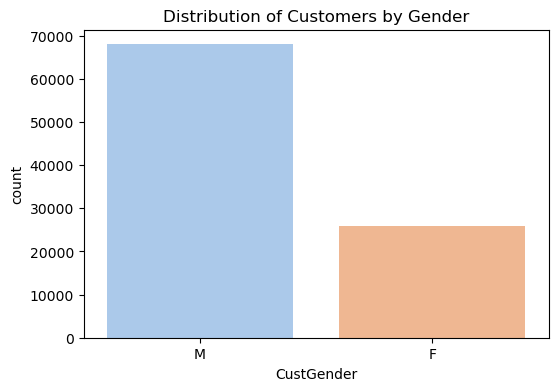

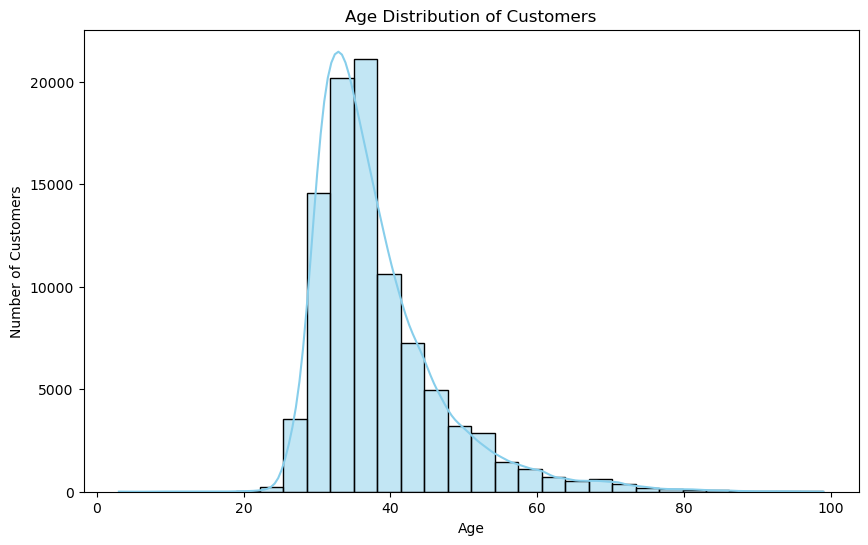

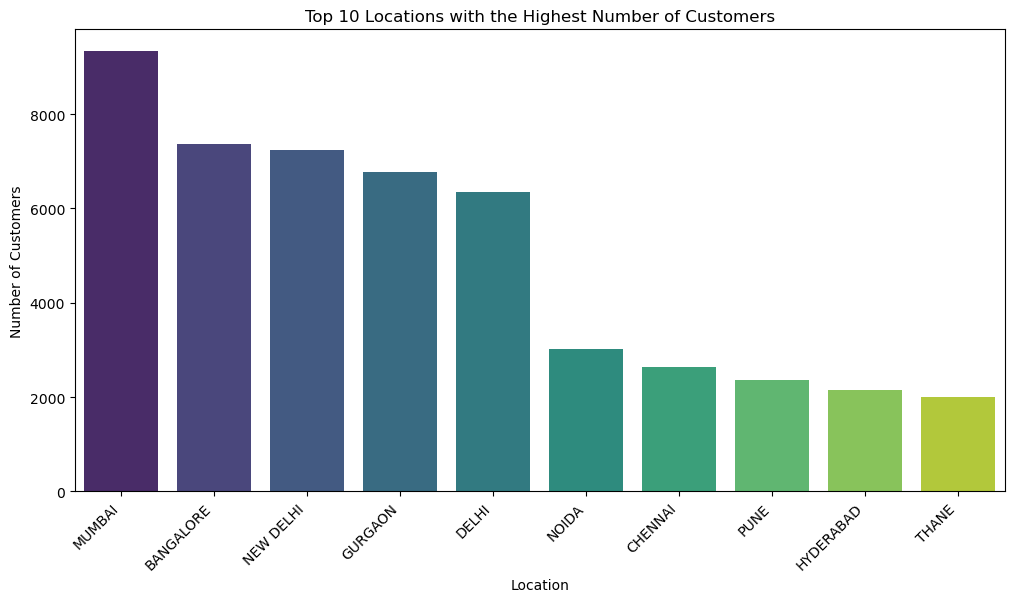

In [15]:
# 1. Distribution of customers by gender (CustGender)
plt.figure(figsize=(6, 4))
sns.countplot(x='CustGender',data = df1, palette='pastel')
plt.title('Distribution of Customers by Gender')
plt.show()

# 2. Age distribution of customers based on "CustomerDOB" column
plt.figure(figsize=(10, 6))
sns.histplot(df1['CustomerAge'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

# 3. Location with the highest number of customers (CustLocation)
location_counts = df1['CustLocation'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')
plt.title('Top 10 Locations with the Highest Number of Customers')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.show()


<b>2. Customer Account and Transaction Analysis:</b>

* What is the distribution of account balances (CustAccountBalance) among customers?
* What is the distribution of transaction amounts (TransactionAmount (INR))?
* Is there any correlation between customer account balance and transaction amount?

In [16]:
df2 = df1.copy()

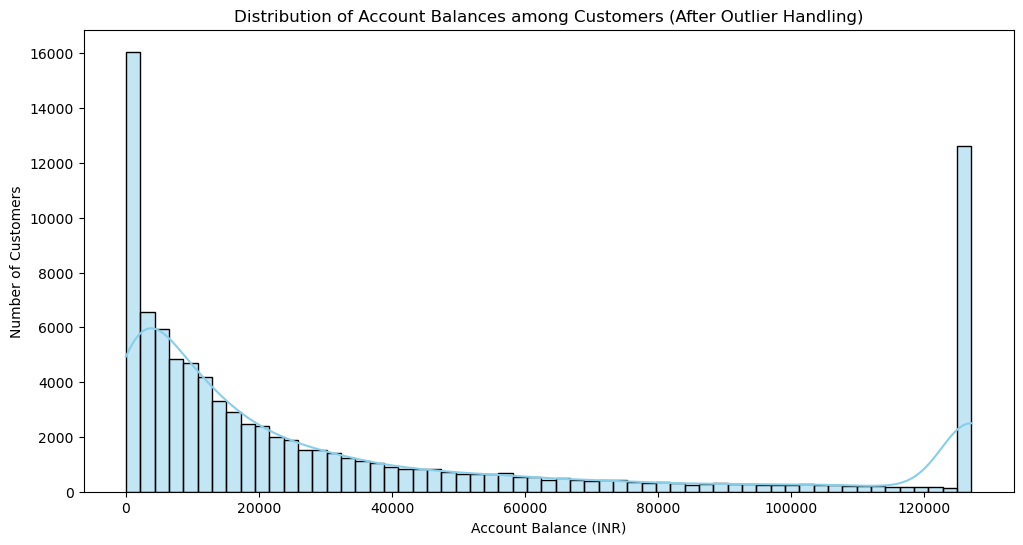

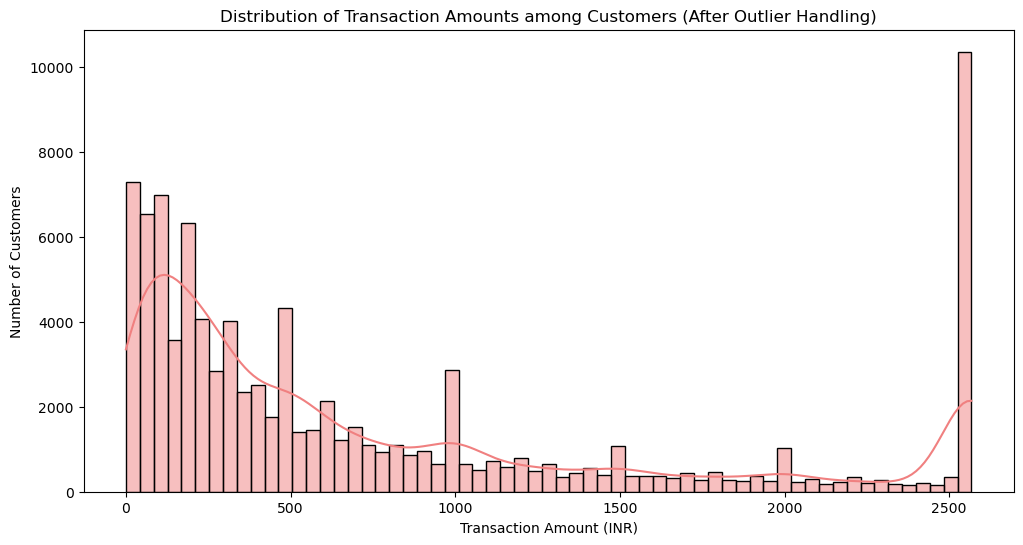

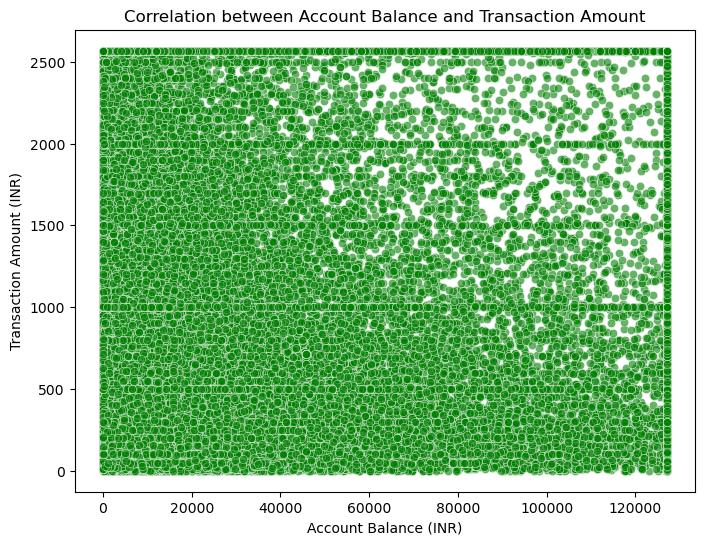

In [17]:
# Outlier Handling using IQR method
def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)
    return data

# Handling outliers for CustAccountBalance and TransactionAmount (INR) columns
df1 = handle_outliers_iqr(df1, 'CustAccountBalance')
df1 = handle_outliers_iqr(df1, 'TransactionAmount (INR)')

# Distribution of account balances (CustAccountBalance) among customers
plt.figure(figsize=(12, 6))
sns.histplot(df1['CustAccountBalance'], kde=True, color='skyblue')
plt.title('Distribution of Account Balances among Customers (After Outlier Handling)')
plt.xlabel('Account Balance (INR)')
plt.ylabel('Number of Customers')
plt.show()

# Distribution of transaction amounts (TransactionAmount (INR)) among customers
plt.figure(figsize=(12, 6))
sns.histplot(df1['TransactionAmount (INR)'], kde=True, color='lightcoral')
plt.title('Distribution of Transaction Amounts among Customers (After Outlier Handling)')
plt.xlabel('Transaction Amount (INR)')
plt.ylabel('Number of Customers')
plt.show()

# Correlation between customer account balance and transaction amount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CustAccountBalance', y='TransactionAmount (INR)', data=df1, color='green', alpha=0.6)
plt.title('Correlation between Account Balance and Transaction Amount')
plt.xlabel('Account Balance (INR)')
plt.ylabel('Transaction Amount (INR)')
plt.show()

In [18]:
df1[["TransactionAmount (INR)", "CustAccountBalance"]].describe()

,TransactionAmount (INR),CustAccountBalance
count,93965.00,93965.00
mean,784.08,36766.43
std,833.39,43693.27
min,0.00,0.00
25%,155.00,4602.13
50%,436.05,16041.66
75%,1120.00,53580.00
max,2567.50,127046.81


<b>3.Customer Location Analysis:</b>
* How are customers distributed across different locations?
* Locations compared with TransactionAmt

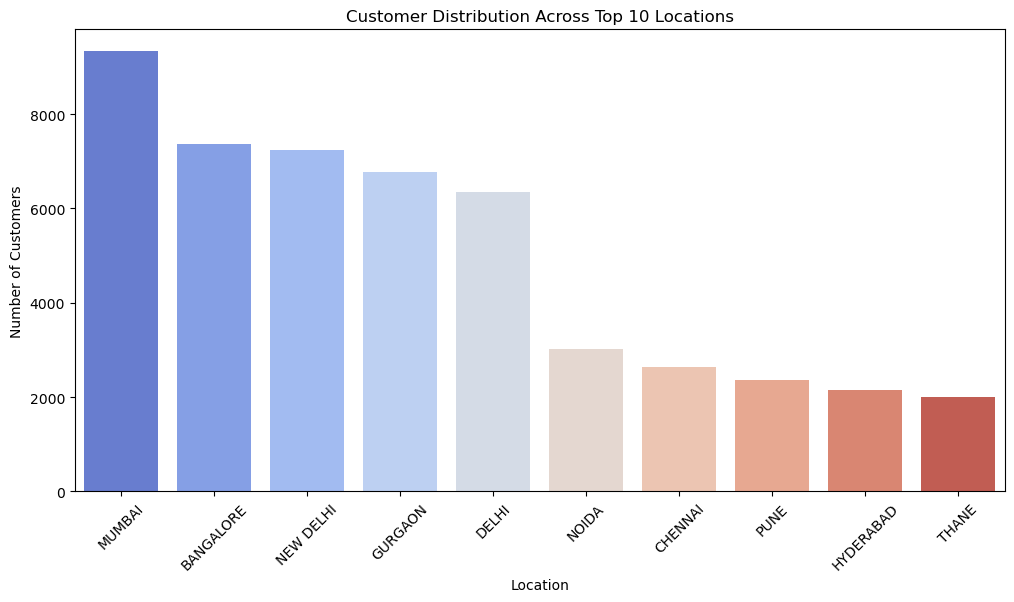

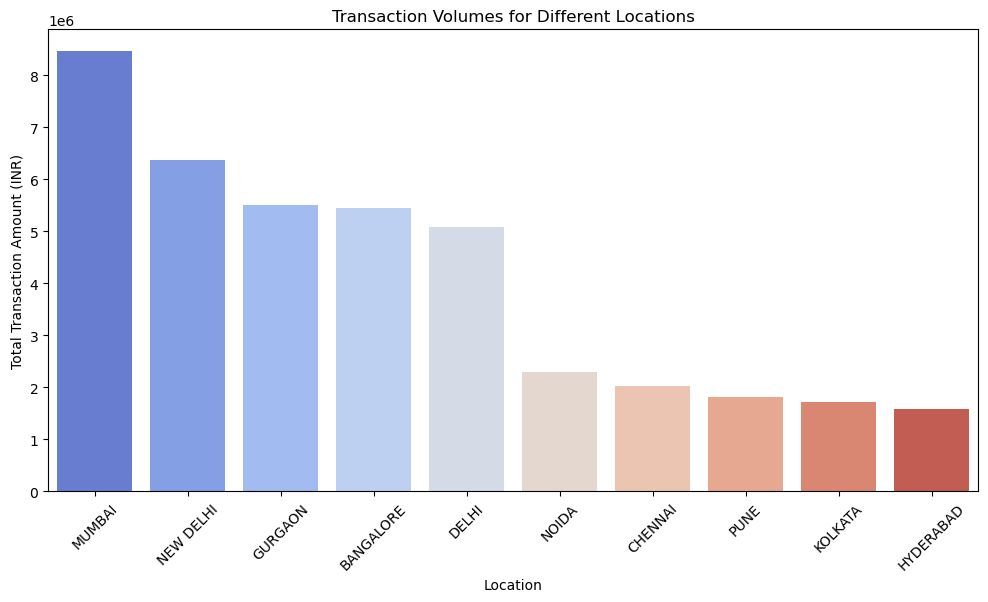

In [19]:
top_10_locations = df1['CustLocation'].value_counts().nlargest(10)

# Visualize customer distribution across top 10 locations
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_locations.index, y=top_10_locations.values, palette='coolwarm')
plt.title('Customer Distribution Across Top 10 Locations')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


location_transaction_volumes = df1.groupby('CustLocation')['TransactionAmount (INR)'].sum().nlargest(10).sort_values(ascending = False)

# Visualize the transaction volumes for each location using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=location_transaction_volumes.index, y=location_transaction_volumes.values, palette='coolwarm')
plt.title('Transaction Volumes for Different Locations')
plt.xlabel('Location')
plt.ylabel('Total Transaction Amount (INR)')
plt.xticks(rotation=45)
plt.show()

<b>4.Customer Recency, Frequency, Monetary (RFM) Analysis:</b>

* Recency (R): The number of days since the customer's most recent transaction.
* Frequency (F): The total number of transactions made by each customer.
* Monetary (M): The total monetary value of all transactions made by each customer.
* How are RFM features distributed among customers, and can we identify valuable customer segments?

In [20]:
df1['TransactionDate'] = pd.to_datetime(df1['TransactionDate'])

current_date = df1['TransactionDate'].max()
rfm_data = df1.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (current_date - x.max()).days,  # Recency calculation
    'TransactionID': 'count',  # Frequency calculation
    'TransactionAmount (INR)': 'sum'  # Monetary calculation
})

rfm_data.rename(columns={
    'TransactionDate': 'Recency',
    'TransactionID': 'Frequency',
    'TransactionAmount (INR)': 'Monetary'
}, inplace=True)


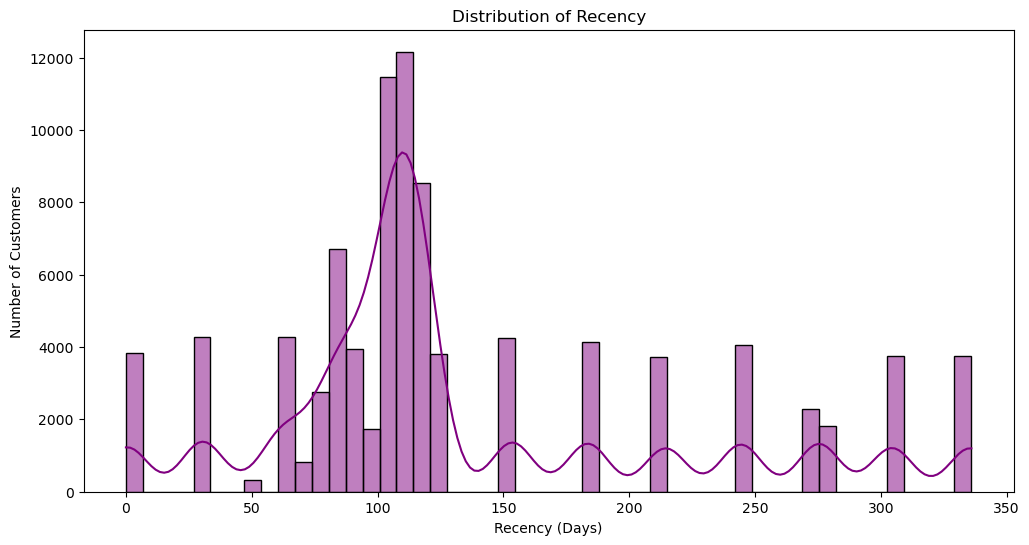

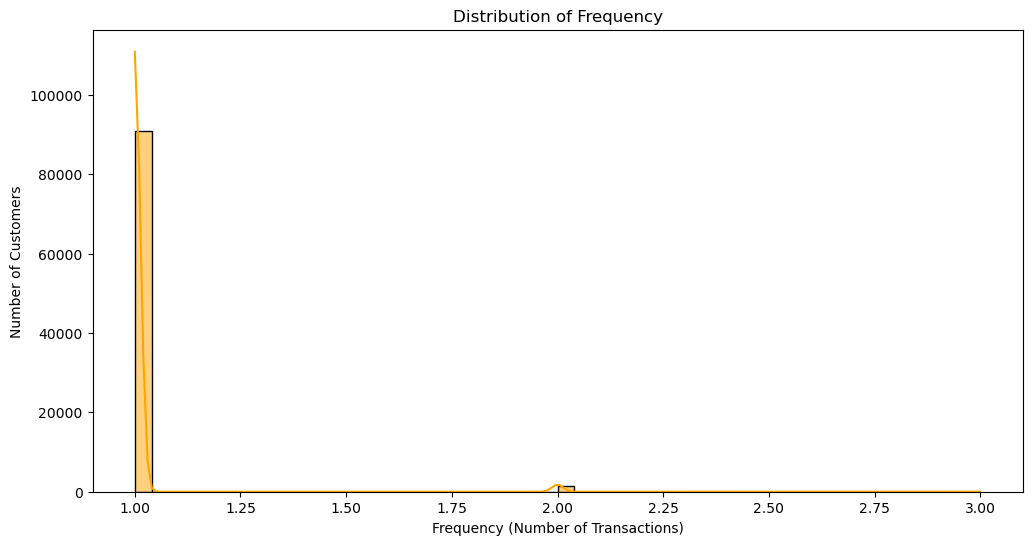

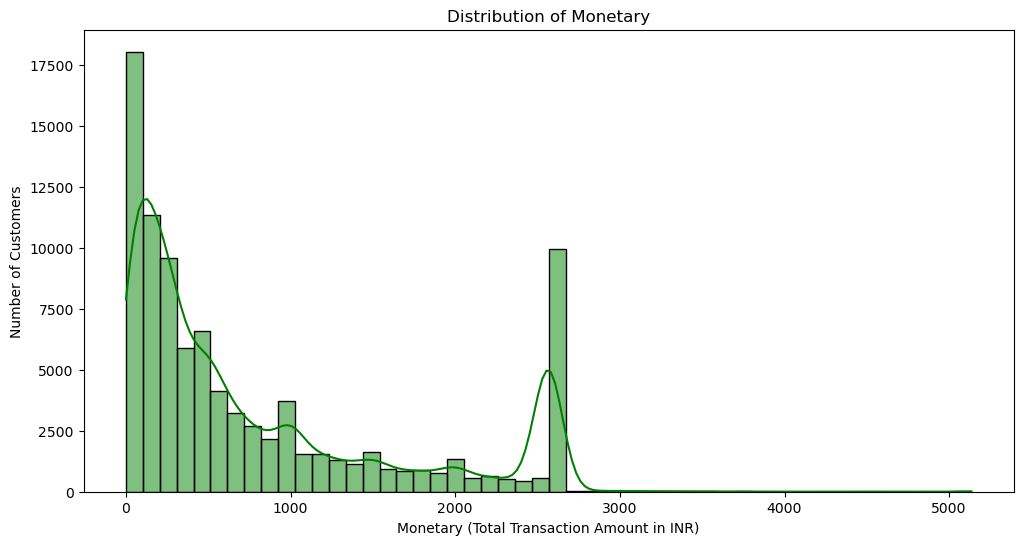

In [21]:
# Visualize the distributions of RFM features
plt.figure(figsize=(12, 6))
sns.histplot(rfm_data['Recency'], bins=50, kde=True, color='purple')
plt.title('Distribution of Recency')
plt.xlabel('Recency (Days)')
plt.ylabel('Number of Customers')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(rfm_data['Frequency'], bins=50, kde=True, color='orange')
plt.title('Distribution of Frequency')
plt.xlabel('Frequency (Number of Transactions)')
plt.ylabel('Number of Customers')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(rfm_data['Monetary'], bins=50, kde=True, color='green')
plt.title('Distribution of Monetary')
plt.xlabel('Monetary (Total Transaction Amount in INR)')
plt.ylabel('Number of Customers')
plt.show()


In [22]:
rfm_data.describe()

,Recency,Frequency,Monetary
count,92444.00,92444.00,92444.00
mean,135.55,1.02,796.98
std,82.27,0.13,846.92
min,0.00,1.00,0.00
25%,91.00,1.00,160.00
50%,111.00,1.00,449.00
75%,183.00,1.00,1150.00
max,336.00,3.00,5135.00


## Data Preprocessing 

In [23]:
df2.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
892845,T892846,C5725279,1984-08-09,M,JASPUR,84447.82,2016-07-09,183210,11858.00,39.00
444994,T444995,C4588538,1994-02-01,M,GURGAON,12549.49,2016-08-16,161300,250.00,29.00
614896,T614897,C2416476,1990-11-14,M,NEW DELHI,33607.65,2016-08-26,102007,3360.00,33.00
457036,T457037,C5940151,1990-09-15,M,HYDERABAD,38238.86,2016-08-21,110438,250.00,33.00
997441,T997442,C5922989,1988-11-27,M,PURBO MEDINIPUR,9506.85,2016-09-14,90810,33.00,35.00


<b>Apply label encoder on "CustGender" and "CustLocation" columns</b>

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
  
df2['CustGender']= le.fit_transform(df2['CustGender'])
df2['CustLocation']= le.fit_transform(df2['CustLocation'])
df2.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
892845,T892846,C5725279,1984-08-09,1,1524,84447.82,2016-07-09,183210,11858.00,39.00
444994,T444995,C4588538,1994-02-01,1,1325,12549.49,2016-08-16,161300,250.00,29.00
614896,T614897,C2416476,1990-11-14,1,2437,33607.65,2016-08-26,102007,3360.00,33.00
457036,T457037,C5940151,1990-09-15,1,1443,38238.86,2016-08-21,110438,250.00,33.00
997441,T997442,C5922989,1988-11-27,1,2801,9506.85,2016-09-14,90810,33.00,35.00


In [25]:
df2 = df2.drop(['TransactionID','CustomerID','CustomerDOB','TransactionDate','TransactionTime'],axis=1)
df2.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge
892845,1,1524,84447.82,11858.00,39.00
444994,1,1325,12549.49,250.00,29.00
614896,1,2437,33607.65,3360.00,33.00
457036,1,1443,38238.86,250.00,33.00
997441,1,2801,9506.85,33.00,35.00


In [26]:
df2[df2['TransactionAmount (INR)'] == 0].count()

CustGender                 67
CustLocation               67
CustAccountBalance         67
TransactionAmount (INR)    67
CustomerAge                67
dtype: int64

In [27]:
df2 = df2.drop(df2[df2['TransactionAmount (INR)'] == 0].index,axis = 0)

In [28]:
from sklearn.preprocessing import StandardScaler

columns_names=['CustGender','CustLocation','CustAccountBalance','TransactionAmount (INR)','CustomerAge']
s = StandardScaler()
df2 = s.fit_transform(df2)
df2 = pd.DataFrame(df2,columns=columns_names)
df2.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge
0,0.62,-0.22,-0.02,1.79,0.09
1,0.62,-0.42,-0.11,-0.21,-1.04
2,0.62,0.70,-0.08,0.33,-0.59
3,0.62,-0.30,-0.08,-0.21,-0.59
4,0.62,1.07,-0.11,-0.25,-0.36


## Data Modelling 

## 1. KMeans Clustering 

In [29]:
import random
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

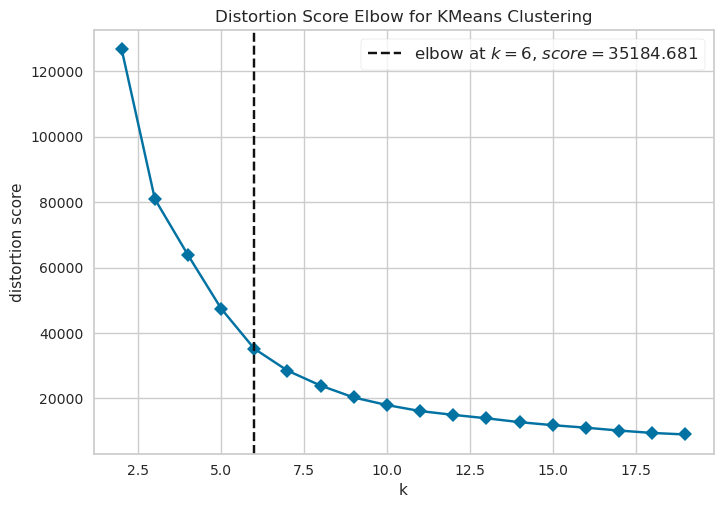

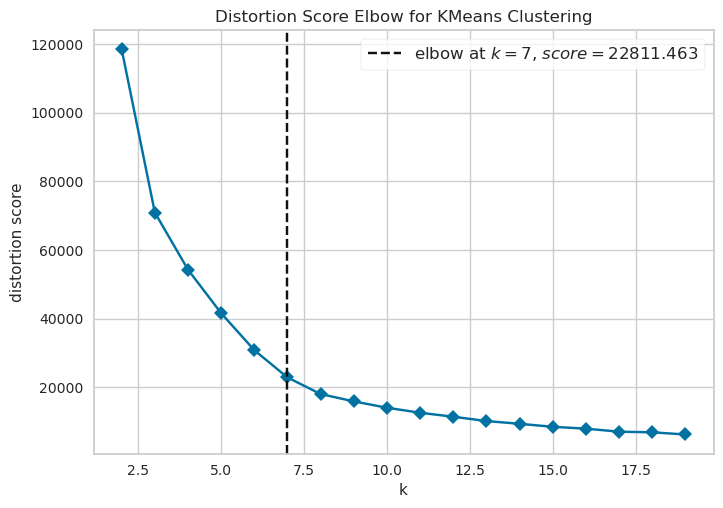

In [30]:
# Extract features from the DataFrame
X = df2[['CustomerAge', 'TransactionAmount (INR)']].values
Y = df2[['CustLocation', 'TransactionAmount (INR)']].values

# Function to perform KMeans clustering and plot the elbow method
def perform_elbow_method(X, k_range, title):
    model = KMeans(init='k-means++', random_state=42)
    visualizer = KElbowVisualizer(model, k=k_range, timings=False)
    visualizer.fit(X)
    plt.title(title)
    visualizer.show()
    
perform_elbow_method(X, k_range=(2, 20), title='Elbow Method for Customer Age Clustering')
perform_elbow_method(Y, k_range=(2, 20), title='Elbow Method for Customer Location Clustering')

* One subset consisted of 'Customer age' and 'TransactionAmount (INR)' as features (referred to as X), while the other subset contained 'CustLocation' and 'TransactionAmount (INR)' (referred to as Y).
* For X, we used the elbow method to determine the optimal number of clusters and found that 6 clusters provided the best fit. Similarly, for Y, 7 clusters were identified as the optimal number. 

In [31]:
# Function to perform KMeans clustering and return the cluster labels and centroids
def perform_kmeans_clustering(X, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    cluster_centers = kmeans.cluster_centers_
    return cluster_labels, cluster_centers

x_cluster_labels, x_cluster_centers = perform_kmeans_clustering(X, num_clusters=6)
y_cluster_labels, y_cluster_centers = perform_kmeans_clustering(Y, num_clusters=7)

In [32]:
print("x_cluster_labels",x_cluster_labels)
print("x_cluster_centers",x_cluster_centers)
print("y_cluster_labels",y_cluster_labels)
print("y_cluster_centers",y_cluster_centers)

x_cluster_labels [3 1 1 ... 0 1 1]
x_cluster_centers [[ 2.53480199e+00  5.80807685e-02]
 [-6.20338517e-01 -1.20499435e-01]
 [ 1.01646728e+00  1.60721835e+01]
 [ 4.85559876e-01 -3.43830252e-02]
 [ 5.51887457e-01  4.52711054e+00]
 [ 2.61689079e-01  7.39070628e+01]]
y_cluster_labels [1 1 5 ... 4 4 0]
y_cluster_centers [[ 1.74166674e+00 -8.92984726e-02]
 [-3.14874333e-01 -8.08494613e-02]
 [ 4.45224158e-02  4.44351709e+00]
 [ 2.24274163e-01  7.39070628e+01]
 [-1.20893670e+00 -8.60520721e-02]
 [ 6.58889636e-01 -6.98882391e-02]
 [ 8.77384944e-03  1.61177819e+01]]


In [33]:
# Add cluster labels to the DataFrame
df2['cluster_age'] = x_cluster_labels
df2['cluster_location'] = y_cluster_labels

# Add centroids to the DataFrame
df2['cen_xx'] = df2.cluster_age.map({i: x_cluster_centers[i][0] for i in range(6)})
df2['cen_xy'] = df2.cluster_age.map({i: x_cluster_centers[i][1] for i in range(6)})
df2['cen_yx'] = df2.cluster_location.map({i: y_cluster_centers[i][0] for i in range(7)})
df2['cen_yy'] = df2.cluster_location.map({i: y_cluster_centers[i][1] for i in range(7)})

df2.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,cluster_age,cluster_location,cen_xx,cen_xy,cen_yx,cen_yy
0,0.62,-0.22,-0.02,1.79,0.09,3,1,0.49,-0.03,-0.31,-0.08
1,0.62,-0.42,-0.11,-0.21,-1.04,1,1,-0.62,-0.12,-0.31,-0.08
2,0.62,0.70,-0.08,0.33,-0.59,1,5,-0.62,-0.12,0.66,-0.07
3,0.62,-0.30,-0.08,-0.21,-0.59,1,1,-0.62,-0.12,-0.31,-0.08
4,0.62,1.07,-0.11,-0.25,-0.36,1,5,-0.62,-0.12,0.66,-0.07


In [34]:
# Define colors for each cluster
colors_X = ['red', 'yellow', 'grey', 'green', 'blue', 'orange']
colors_Y = ['red', 'yellow', 'grey', 'green', 'blue', 'orange', 'pink']

# Add cluster colors to the DataFrame
df2['color_age_km'] = df2.cluster_age.map({i: colors_X[i] for i in range(6)})
df2['color_location_km'] = df2.cluster_location.map({i: colors_Y[i] for i in range(7)})

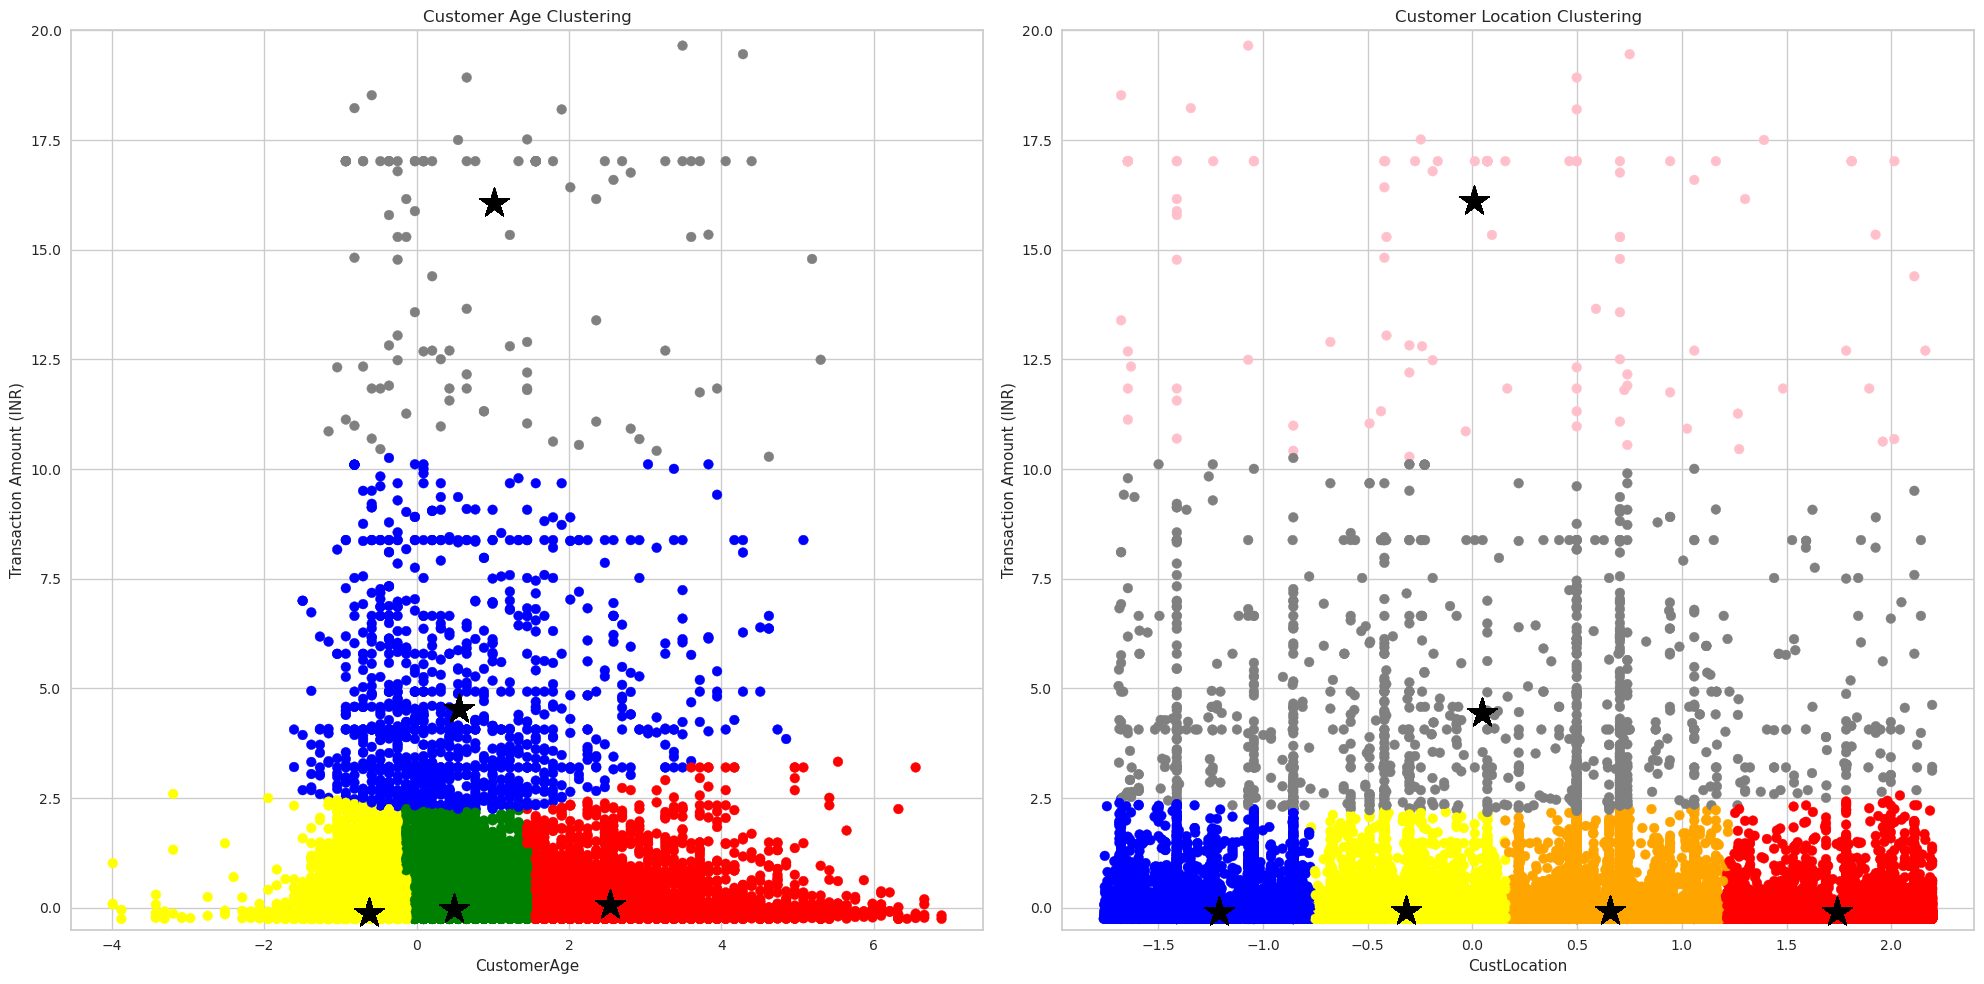

In [35]:
# Plot the scatter plot with cluster colors and centroids for 'Customer age' and 'TransactionAmount (INR)'
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.scatter(df2['CustomerAge'], df2['TransactionAmount (INR)'], c=df2.color_age_km)
plt.scatter(df2['cen_xx'], df2['cen_xy'], marker='*', s=500, c='black')
plt.ylim([-0.5, 20])
plt.xlabel('CustomerAge')
plt.ylabel('Transaction Amount (INR)')
plt.title('Customer Age Clustering')

# Plot the scatter plot with cluster colors and centroids for 'CustLocation' and 'TransactionAmount (INR)'
plt.subplot(1, 2, 2)
plt.scatter(df2['CustLocation'], df2['TransactionAmount (INR)'], c=df2.color_location_km)
plt.scatter(df2['cen_yx'], df2['cen_yy'], marker='*', s=500, c='black')
plt.ylim([-0.5, 20])
plt.xlabel('CustLocation')
plt.ylabel('Transaction Amount (INR)')
plt.title('Customer Location Clustering')

plt.tight_layout()  # Adjusts the spacing between the plots
plt.show()

## Evaluation of the Model 
We will be using <b>Silhouette Score</b> for the task since it's a unsupervised method.<br>
The Silhouette Score is a metric used to evaluate the quality of clustering results.<br> 
It measures how well-separated the clusters are and provides a numerical value between <b>-1 and 1</b>.<br>
* A score close to 1 indicates that the data point is well-clustered and far away from other clusters, representing good separation.
* A score close to 0 suggests overlapping clusters or data points on the decision boundary between clusters.
* A negative score indicates that the data point might have been assigned to the wrong cluster.

In [36]:
from sklearn.metrics import silhouette_score

# Silhouette Score for cluster_age
silhouette_score_age = silhouette_score(df2[['TransactionAmount (INR)', 'CustomerAge']], df2['cluster_age'])
print("Silhouette Score for cluster_age:", silhouette_score_age)

# Silhouette Score for cluster_location
silhouette_score_location = silhouette_score(df2[['CustLocation','TransactionAmount (INR)']], df2['cluster_location'])
print("Silhouette Score for cluster_location:", silhouette_score_location)


Silhouette Score for cluster_age: 0.515584770195384
Silhouette Score for cluster_location: 0.5402121415164283


<b>Silhouette Score for cluster_age:  0.516</b> The score of 0.516 suggests that the clusters are reasonably well-defined, with some overlap or ambiguity at the boundaries.<br>
<b>Silhouette Score for cluster_location: 0.540 </b> The clusters are relatively well-defined, and the data points show clearer distinctions between clusters.<br>
The clustering model has done a decent job in partitioning the data into meaningful groups, but there is still room for improvement. 
To further enhance the model, we may consider experimenting with different clustering algorithms, hyperparameter tuning that could better discriminate the clusters. 

## Further Analysis

In [37]:
df2.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,cluster_age,cluster_location,cen_xx,cen_xy,cen_yx,cen_yy,color_age_km,color_location_km
0,0.62,-0.22,-0.02,1.79,0.09,3,1,0.49,-0.03,-0.31,-0.08,green,yellow
1,0.62,-0.42,-0.11,-0.21,-1.04,1,1,-0.62,-0.12,-0.31,-0.08,yellow,yellow
2,0.62,0.70,-0.08,0.33,-0.59,1,5,-0.62,-0.12,0.66,-0.07,yellow,orange
3,0.62,-0.30,-0.08,-0.21,-0.59,1,1,-0.62,-0.12,-0.31,-0.08,yellow,yellow
4,0.62,1.07,-0.11,-0.25,-0.36,1,5,-0.62,-0.12,0.66,-0.07,yellow,orange


In [38]:
age_cluster_avg = df2.groupby('cluster_age').mean().reset_index()
location_cluster_avg = df2.groupby('cluster_location').mean().reset_index()

print("Cluster_Age") 
print(age_cluster_avg[['CustLocation','CustAccountBalance','TransactionAmount (INR)','CustomerAge']])
print("\n")
print("Cluster_Location")
print(location_cluster_avg[['CustLocation','CustAccountBalance','TransactionAmount (INR)','CustomerAge']])

Cluster_Age
   CustLocation  CustAccountBalance  TransactionAmount (INR)  CustomerAge
0          0.01                0.31                     0.06         2.53
1         -0.01               -0.06                    -0.12        -0.62
2          0.01                0.85                    16.07         1.02
3          0.01                0.03                    -0.03         0.49
4          0.03                0.18                     4.53         0.55
5          0.22               -0.07                    73.91         0.26


Cluster_Location
   CustLocation  CustAccountBalance  TransactionAmount (INR)  CustomerAge
0          1.74               -0.03                    -0.09        -0.06
1         -0.31                0.01                    -0.08        -0.01
2          0.04                0.19                     4.43         0.64
3          0.22               -0.07                    73.91         0.26
4         -1.21               -0.03                    -0.09        -0.03
5      

<b>Cluster_Age</b>
* <b>Cluster 0 :</b> middle-aged customers with moderate transaction activity.
* <b>Cluster 1 :</b> younger customers with low transaction activity and lower account balances.
* <b>Cluster 2 :</b> older customers who make substantial transactions and maintain higher account balances.
* <b>Cluster 3 :</b> diverse group of customers with moderate account balances and transaction amounts.
* <b>Cluster 4 :</b> financially stable customers who make sizeable transactions.
* <b>Cluster 5 :</b> younger customers who make large transactions.

<b>Cluster_Location</b>
* <b>Cluster 0 :</b> diverse group of customers from specific locations.
* <b>Cluster 1 :</b> mixed group with moderate account balances and transaction amounts.
* <b>Cluster 2 :</b> younger customers from specific locations making significant transactions.
* <b>Cluster 3 :</b> younger customers from specific locations making substantial transactions.
* <b>Cluster 4 :</b> customers from various locations with lower account balances and transaction amounts.
* <b>Cluster 5 :</b> customers from specific locations who maintain higher account balances and make moderate transactions.
* <b>Cluster 6 :</b> older customers who make substantial transactions and maintain higher account balances.

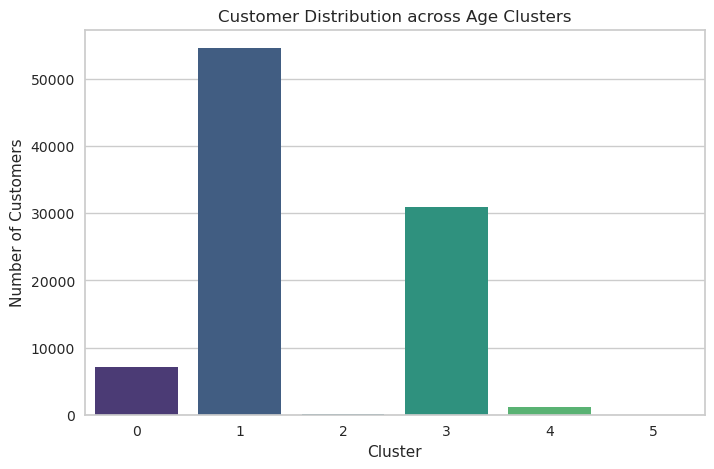

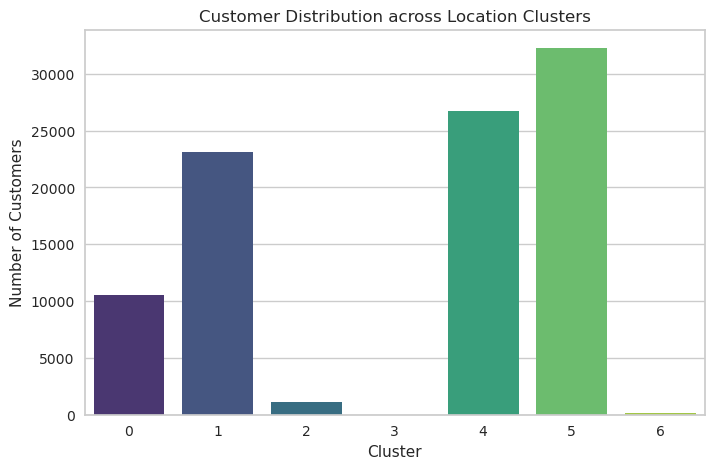

In [39]:
# Count the number of customers in each 'cluster_age_km' and 'cluster_location_km'
age_cluster_counts = df2['cluster_age'].value_counts().reset_index()
age_cluster_counts.columns = ['Cluster', 'Count']

location_cluster_counts = df2['cluster_location'].value_counts().reset_index()
location_cluster_counts.columns = ['Cluster', 'Count']

# Function to plot cluster distribution
def plot_cluster_distribution(cluster_counts, title):
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Cluster', y='Count', data=cluster_counts, palette='viridis')
    plt.title(title)
    plt.xlabel('Cluster')
    plt.ylabel('Number of Customers')
    plt.show()


plot_cluster_distribution(age_cluster_counts, title='Customer Distribution across Age Clusters')
plot_cluster_distribution(location_cluster_counts, title='Customer Distribution across Location Clusters')



The findings highlight the importance of understanding customer segments based on age and location. 
* Cluster_Age : Cluster 1, consisting of younger customers with lower activity, might be a potential target for engagement and marketing strategies to increase their transaction involvement. Cluster 3, representing a diverse group of customers, requires a tailored approach to meet their varying needs. 
* Cluser_Location : Additionally, the bank can focus on serving customers from clusters 5 and 4, which have distinct characteristics in terms of location and transaction behavior.

## Conclusion 
* <b>Diverse Customer Landscape:</b> includes clusters with younger customers having lower transaction activity (Cluster 1) to financially stable customers making sizeable transactions (Cluster 4).
* <b>Youth Engagement Opportunity:</b> Cluster 1, comprising younger customers with lower transaction activity, presents an opportunity for targeted marketing and engagement efforts.
* <b>Location-Specific Strategies:</b> clusters (Clusters 0, 4, and 5) highlight the importance of tailoring strategies to specific regions.
* <b>High-Value Customers:</b> Cluster 2 represents older customers who engage in substantial transactions and maintain higher account balances. 

To optimize marketing efforts, the bank should focus on customer segments with higher representation, such as clusters 1 and 3 (age-based clusters) and clusters 5, 4, 1, and 0 (location-based clusters). Targeting these clusters can lead to effective customer engagement and better ROI on marketing campaigns.
